# Trips marked as HOV with tolls attatched
For some reason, trips marked as HOV in the trip level data also have tolls that are non-zero attatched. It seems that there is no census info to attatch to these trips and there is no correlation between toll or time of when they occur. It would be best to treat these as though they have not been charged since the BOS table *should* have had information attatched and did not

In [1]:
library(ggplot2)
library(RSQLCipher)
suppressMessages(library(tidyverse))
suppressMessages(library(lubridate))

In [2]:
Sys.setenv("SQL_KEY"=Sys.getenv("HOT_KEY"))
db_path = "../../../db/hot-v3.db"
trips = load_table(db_path, "trips_2pct")
full_trips = load_table(db_path, "trips_linked")

In [3]:
hov_toll <- full_trips %>%
    filter(is_hov == 1,
          toll != 0) %>%
    execute

Warning message:
“238 parsing failures.
  row   col           expected               actual         file
18547 plate 1/0/T/F/TRUE/FALSE -7661928871856290632 literal data
18548 plate 1/0/T/F/TRUE/FALSE -7065698726345122156 literal data
18549 plate 1/0/T/F/TRUE/FALSE -3079880921580456454 literal data
18550 plate 1/0/T/F/TRUE/FALSE -8297833802926057871 literal data
18552 plate 1/0/T/F/TRUE/FALSE 1901479717339384043  literal data
..... ..... .................. .................... ............
See problems(...) for more details.
”

In [4]:
head(hov_toll)
hov_toll %>%
    filter(fips != NA) 

trip_id,def_id,toll,entry_time,exit_time,entry_plaza,exit_plaza,is_hov,tag_id,acct,plate,id,plate_state,zip,plus4_code,fips
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<lgl>,<dbl>
104025353,2701,0.75,1514891841,1514892194,19,22,1,NA,NA,NA,NA,NA,NA,NA,NA
104025483,2701,0.75,1514883059,1514883440,19,23,1,NA,NA,NA,NA,NA,NA,NA,NA
104025716,2714,0.75,1514896356,1514896698,13,16,1,NA,NA,NA,NA,NA,NA,NA,NA
104025776,2705,0.75,1514882430,1514882481,16,17,1,NA,NA,NA,NA,NA,NA,NA,NA
104026246,2715,0.75,1514904605,1514905417,13,22,1,NA,NA,NA,NA,NA,NA,NA,NA
104026382,2706,0.75,1514885457,1514885702,16,20,1,NA,NA,NA,NA,NA,NA,NA,NA


trip_id,def_id,toll,entry_time,exit_time,entry_plaza,exit_plaza,is_hov,tag_id,acct,plate,id,plate_state,zip,plus4_code,fips
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<lgl>,<dbl>


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

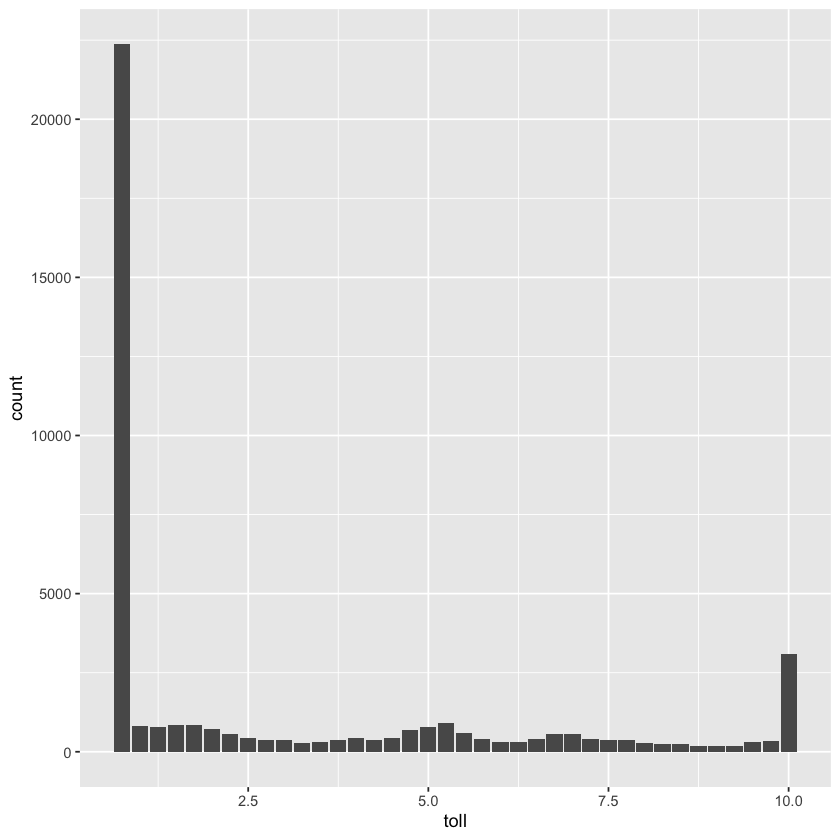

In [5]:
ggplot(hov_toll, aes(x = toll)) +
    geom_histogram(stat = "count")

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

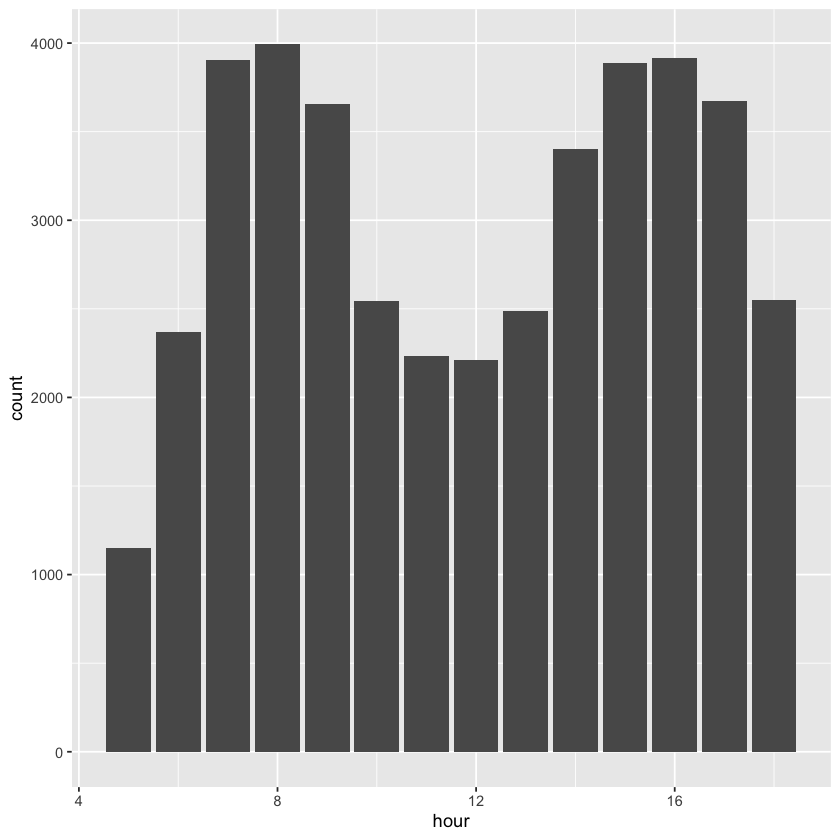

In [6]:
hov_toll$hour <- as_datetime(hov_toll$entry_time)
hov_toll$hour <- hour(hov_toll$hour)
ggplot(hov_toll, aes(x = hour)) +
    geom_histogram(stat = "count")